# CRISP-DM Methodology for UFC Fight Prediction

## 1. Business Understanding
   - Define the problem: Predict the winner of UFC fight.
   - Objectives: Create an ML model to predict winners accurately.
   - Success criteria: Achieve prediction accuracy above 70%.

## 2. Data Understanding
   - Gather data: Collect historical UFC fight data.
   - Explore data: Understand its structure, quality, and relationships.

## 3. Data Preparation
   - Preprocess data: Handle missing values, outliers, etc.
   - Feature engineering: Create or transform features for better performance.

## 4. Modeling
   - Select algorithms: Choose suitable ML algorithms.
   - Train-test split: Divide data into training and testing sets.
   - Model training: Train selected algorithms on training data.
   - Model evaluation: Assess model performance using various metrics.

## 5. Evaluation
   - Assess model performance: Compare models, tune hyperparameters.
   - Validate results: Validate model on testing data.

## 6. Deployment
   - Deploy the model: Integrate into a platform for predictions.
   - Monitor performance: Continuously monitor and update the model.

## 7. Iterative Improvement
   - Gather feedback: Collect user and stakeholder feedback.
   - Update the model: Incorporate feedback and new data.
   - Repeat the process: Iterate through the CRISP-DM process for improvements.


## CRISP-DM: 2. Data Understanding

### Import Python Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Common Helpers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

###  Load the Dataset

In [2]:
data_file = 'DataUfc/data.csv'
df = pd.read_csv(data_file)

### Preview Data

In [3]:
df.shape

(6012, 144)

The dataset is 144 columns, and because of that we will need to tweek the pandas display options to be able to see all the columns.

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

###  Exploratory Data Analysis (EDA)

In [5]:
#Preview of dataset provided by kaggle
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7

Every row is a compilation of info about each fighter up until that fight. 

In [6]:
#Check datatypes by using info() 
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 144 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    R_fighter                     6012 non-null   object 
 1    B_fighter                     6012 non-null   object 
 2    Referee                       5980 non-null   object 
 3    date                          6012 non-null   object 
 4    location                      6012 non-null   object 
 5    Winner                        6012 non-null   object 
 6    title_bout                    6012 non-null   bool   
 7    weight_class                  6012 non-null   object 
 8    B_avg_KD                      4585 non-null   float64
 9    B_avg_opp_KD                  4585 non-null   float64
 10   B_avg_SIG_STR_pct             4585 non-null   float64
 11   B_avg_opp_SIG_STR_pct         4585 non-null   float64
 12   B_avg_TD_pct                  4585 non-null   

#### Summary Statistics for Numerical Columns:

In [7]:
#Calculate summary statistics for numerical columns (mean, median, standard deviation, etc.).
df.describe(include = 'all')

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,6012,6012,5980,6012,6012,6012,6012,6012,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.0,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,5946,6002.000000,5121.000000,6004.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.00000,

### Column definitions:

```markdown
- **R_ and B_ Prefix**: Signifies red and blue corner fighter stats respectively.
- **_opp_ Columns**: Contain the average of damage done by the opponent on the fighter.
- **KD**: Number of knockdowns.
- **SIG_STR**: Number of significant strikes landed of attempted.
- **SIG_STR_pct**: Significant strikes percentage.
- **TOTAL_STR**: Total strikes landed of attempted.
- **TD**: Number of takedowns.
- **TD_pct**: Takedown percentages.
- **SUB_ATT**: Number of submission attempts.
- **PASS**: Number of times the guard was passed.
- **REV**: Number of reversals landed.
- **HEAD**: Number of significant strikes to the head landed of attempted.
- **BODY**: Number of significant strikes to the body landed of attempted.
- **CLINCH**: Number of significant strikes in the clinch landed of attempted.
- **GROUND**: Number of significant strikes on the ground landed of attempted.
- **win_by**: Method of win.
- **last_round**: Last round of the fight (e.g., if it was a KO in 1st, then this will be 1).
- **last_round_time**: When the fight ended in the last round.
- **Format**: Format of the fight (3 rounds, 5 rounds, etc.).
- **Referee**: Name of the referee.
- **Date**: Date of the fight.
- **Location**: Location in which the event took place.
- **Fight_type**: Weight class and whether it's a title bout or not.
- **Winner**: Winner of the fight.
- **Stance**: Stance of the fighter (orthodox, southpaw, etc.).
- **Height_cms**: Height in centimeters.
- **Reach_cms**: Reach of the fighter (arm span) in centimeters.
- **Weight_lbs**: Weight of the fighter in pounds (lbs).
- **Age**: Age of the fighter.
- **title_bout**: Boolean value of whether it is a title fight or not.
- **weight_class**: Weight class the fight is in (Bantamweight, Heavyweight, Women's Flyweight, etc.).
- **no_of_rounds**: Number of rounds the fight was scheduled for.
- **current_lose_streak**: Count of current concurrent losses of the fighter.
- **current_win_streak**: Count of current concurrent wins of the fighter.
- **draw**: Number of draws in the fighter's UFC career.
- **wins**: Number of wins in the fighter's UFC career.
- **losses**: Number of losses in the fighter's UFC career.
- **total_rounds_fought**: Average of total rounds fought by the fighter.
- **total_time_fought (seconds)**: Count of total time spent fighting in seconds.
- **total_title_bouts**: Total number of title bouts taken part in by the fighter.
- **win_by_Decision_Majority**: Number of wins by majority judges decision in the fighter's UFC career.
- **win_by_Decision_Split**: Number of wins by split judges decision in the fighter's UFC career.
- **win_by_Decision_Unanimous**: Number of wins by unanimous judges decision in the fighter's UFC career.
- **win_by_KO/TKO**: Number of wins by knockout in the fighter's UFC career.
- **win_by_Submission**: Number of wins by submission in the fighter's UFC career.
- **win_by_TKO_Doctor_Stoppage**: Number of wins by doctor stoppage in the fighter's UFC career.
```

In [8]:
# The below code shows null values present in the data in column-wise
df.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           32
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
B_avg_KD                        1427
B_avg_opp_KD                    1427
B_avg_SIG_STR_pct               1427
B_avg_opp_SIG_STR_pct           1427
B_avg_TD_pct                    1427
B_avg_opp_TD_pct                1427
B_avg_SUB_ATT                   1427
B_avg_opp_SUB_ATT               1427
B_avg_REV                       1427
B_avg_opp_REV                   1427
B_avg_SIG_STR_att               1427
B_avg_SIG_STR_landed            1427
B_avg_opp_SIG_STR_att           1427
B_avg_opp_SIG_STR_landed        1427
B_avg_TOTAL_STR_att             1427
B_avg_TOTAL_STR_landed          1427
B_avg_opp_TOTAL_STR_att         1427
B_avg_opp_TOTAL_STR_landed      1427
B_avg_TD_att                    1427
B

### Data Categories
* Numerical Columns: Many numerical columns such as those related to average statistics (e.g., average knockdowns, significant strike percentages, takedown percentages, etc.) have a substantial number of missing values (1427 missing values). This suggests that there may be instances where this statistical information was not recorded for certain fights or fighters.
* Categorical Columns: Categorical columns like 'Stance' for both red and blue fighters also have missing values, albeit fewer compared to the numerical columns. Similarly, the 'Referee' column has 32 missing values.
* Physical Attributes: Columns related to physical attributes like height, reach, and weight also have missing values. For example, 'B_Reach_cms' has 891 missing values, 'R_Reach_cms' has 406 missing values, 'B_Height_cms' has 10 missing values, and 'R_Height_cms' has 4 missing values. The number of missing values in these columns is relatively smaller compared to the numerical columns.
* Age: Both 'B_age' and 'R_age' columns have missing values (172 and 63 missing values respectively), indicating that the age of some fighters is not recorded in the dataset.
* Winner: It's noteworthy that the 'Winner' column has no missing values, indicating that the outcome of each fight is known.

#### Distribution of Null Values 

In [9]:
#This code will iterate over all columns in the DataFrame, 
# and if a column starts with 'B_', it will add the column name to the list B_fighters_columns.
B_fighters_columns = []
for column in df.columns:
        if column.startswith('B_'):
            B_fighters_columns.append(column)

In [10]:
#Same code but for R_fighters.
R_fighters_columns = []
for column in df.columns:
        if column.startswith('R_'):
            R_fighters_columns.append(column)

In [11]:
#function null_values_vis_bar_plot takes four parameters: df, columns_list, color, and title. 
#It generates a bar plot to visualize the count of null (NaN) values in columns 
# of a DataFrame specified in the columns_list.
def null_values_vis_bar_plot(df, columns_list, color, title):
    null_values = {}

    for column in columns_list:
        if df[column].isnull().sum()!=0:
            null_values[column] = df[column].isnull().sum()

    # Create bar plot for null counts in columns starting with 'B'
    plt.figure(figsize=(18,8))
    plt.bar(null_values.keys(), null_values.values(), color=color)
    plt.xlabel('Columns')
    plt.ylabel('Count of Null Values')
    plt.title(f'{title}')

    plt.xticks(rotation=90)  # Rotate x-axis tick labels vertically

    plt.show()

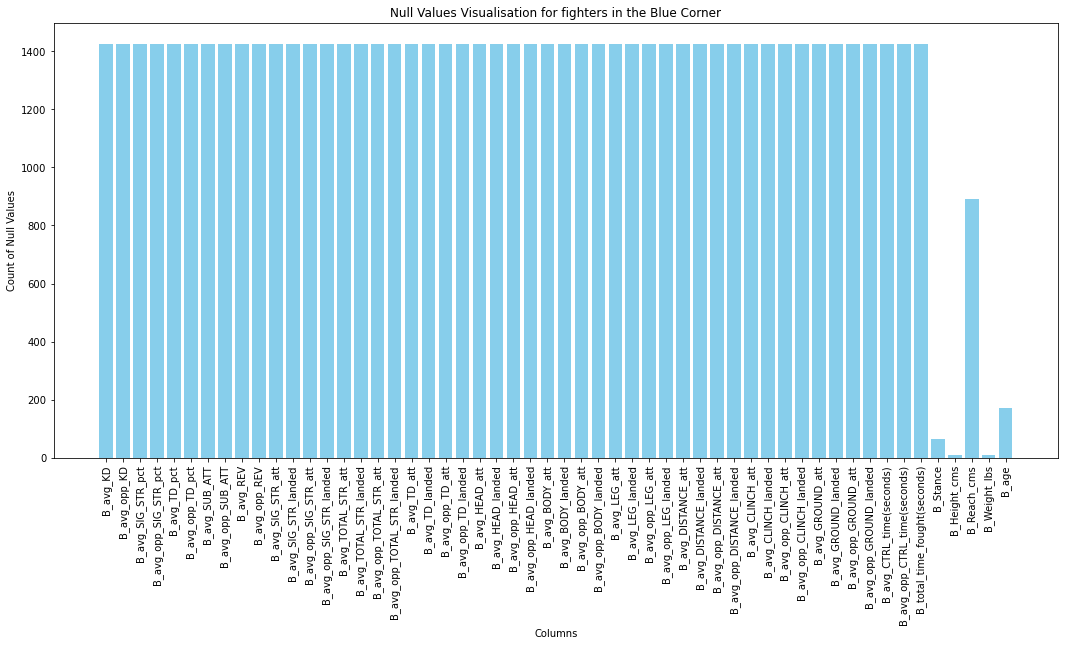

In [12]:
null_values_vis_bar_plot(df, B_fighters_columns, 'skyblue', "Null Values Visualisation for fighters in the Blue Corner")

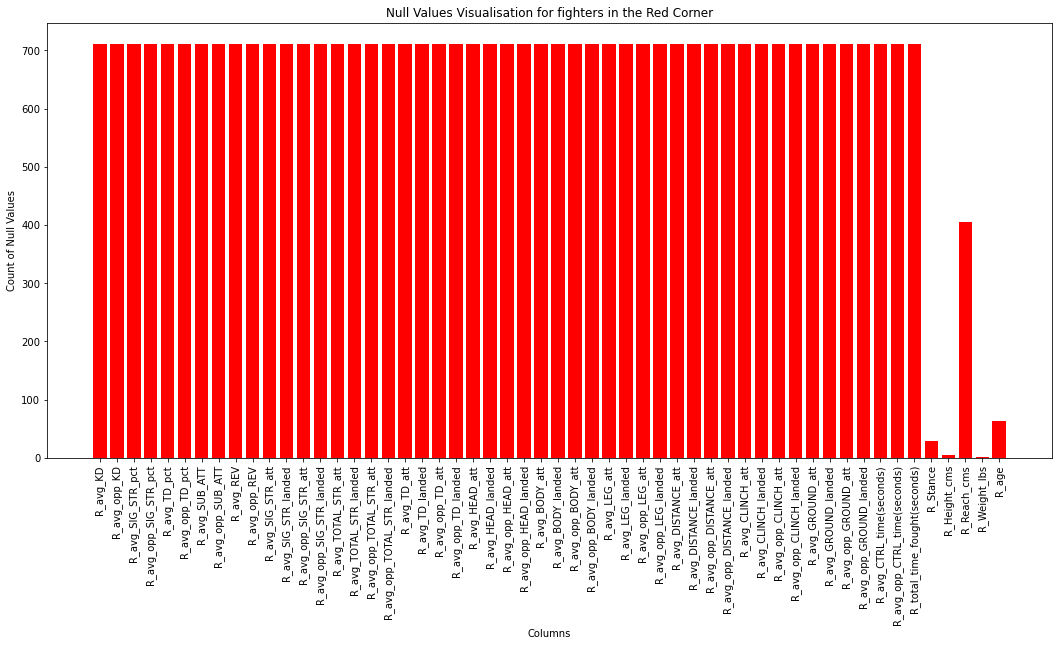

In [13]:
null_values_vis_bar_plot(df, R_fighters_columns, 'red', "Null Values Visualisation for fighters in the Red Corner")

In [14]:
#Checking null values in columns that doesn't related to the fighters (exclude R_ and B_ letter in the begining of the columns)
for column in df.columns:
        if df[column].isnull().sum()!=0 and not column.startswith('R_') and not column.startswith('B_'):
            print(f"Nan in {column}: {df[column].isnull().sum()}")

Nan in Referee: 32


* As we can see above, Blue fighters have 1427 missing rows and Red fighters have 712.
* We can also notice that the only column that has missing values and does not related to any fighter is Referee column, which we don't really need for our further analysis and model, so we just simply drop it.
* My assumption is that they probably must not have had any UFC fights before, that's why their stats data are missing. Let's check it.

In [15]:
# Filter the DataFrame to include only rows with null values in columns that start with 'B_'
df_null = df[df.filter(like='B_').isnull().any(axis=1)]

# Display the DataFrame
df_null.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                            8
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
B_avg_KD                        1427
B_avg_opp_KD                    1427
B_avg_SIG_STR_pct               1427
B_avg_opp_SIG_STR_pct           1427
B_avg_TD_pct                    1427
B_avg_opp_TD_pct                1427
B_avg_SUB_ATT                   1427
B_avg_opp_SUB_ATT               1427
B_avg_REV                       1427
B_avg_opp_REV                   1427
B_avg_SIG_STR_att               1427
B_avg_SIG_STR_landed            1427
B_avg_opp_SIG_STR_att           1427
B_avg_opp_SIG_STR_landed        1427
B_avg_TOTAL_STR_att             1427
B_avg_TOTAL_STR_landed          1427
B_avg_opp_TOTAL_STR_att         1427
B_avg_opp_TOTAL_STR_landed      1427
B_avg_TD_att                    1427
B

* At first I wanted to create to separate DataFrames for B_fighters and for B_fighters, but as we can see above in the filtered DataFrame that has missing values and starts with 'B_' we have the exact amount of missing data in columns for R_fighters.
* So we have at least a 712 fights where average stats for both fighters are missing. 


In [16]:
#This function takes as input the fight_counts, which is a Series containing the count of fights for each fighter.
def miss_vals_by_numberOfFights(fight_counts, color):
    
    # Count the number of unique fight counts
    unique_fight_counts = fight_counts.value_counts().sort_index()

    # Visualize the distribution of fighters with missing values based on their fight counts
    plt.figure(figsize=(10, 6))
    plt.bar(unique_fight_counts.index, unique_fight_counts.values, color=color)
    plt.title('Distribution of Fighters with Missing Values by Number of Fights')
    plt.xlabel('Number of Fights')
    plt.ylabel('Number of Fighters')
    plt.xticks(unique_fight_counts.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

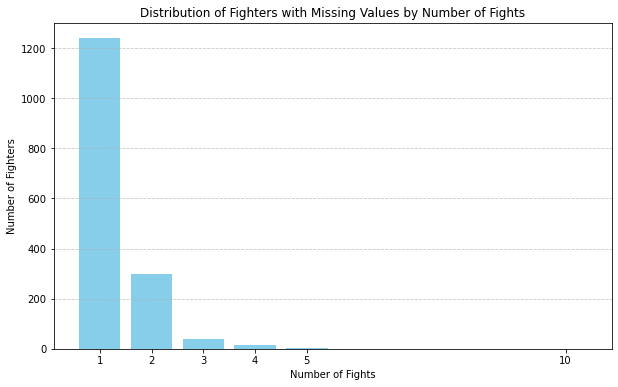

In [17]:
# Count the number of fights for each B_fighters in the dataset
B_fight_counts = df_null['B_fighter'].value_counts()

miss_vals_by_numberOfFights(B_fight_counts, 'skyblue')

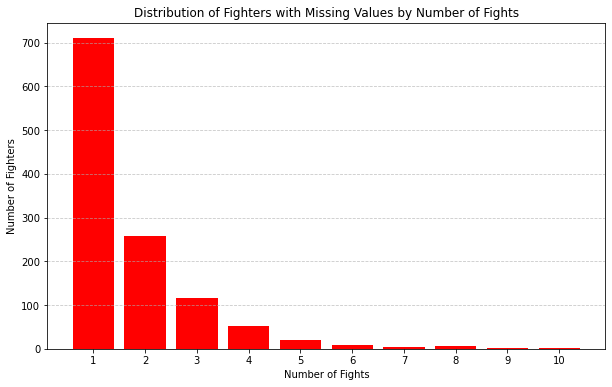

In [18]:
# Count the number of fights for each R_fighters in the dataset
R_fight_counts = df_null['R_fighter'].value_counts()

miss_vals_by_numberOfFights(R_fight_counts, 'red')

* Here we can see from the above, that my assumption was correct, if fighter's stats are missing because it is their first fight, it would typically fall under the category of Missing at Random (MAR) missing data type. We will handle them later.

#### Visualisation of Relationships Between Variables:

Let's check the correlation between B_opp_ columns that contain the average of damage done by the R_fighter on the B_fighter and R_avg columns that contain the average of damage done by R_fighter. 

In [19]:
# Create a DataFrame without null values
df_no_null = df.dropna()

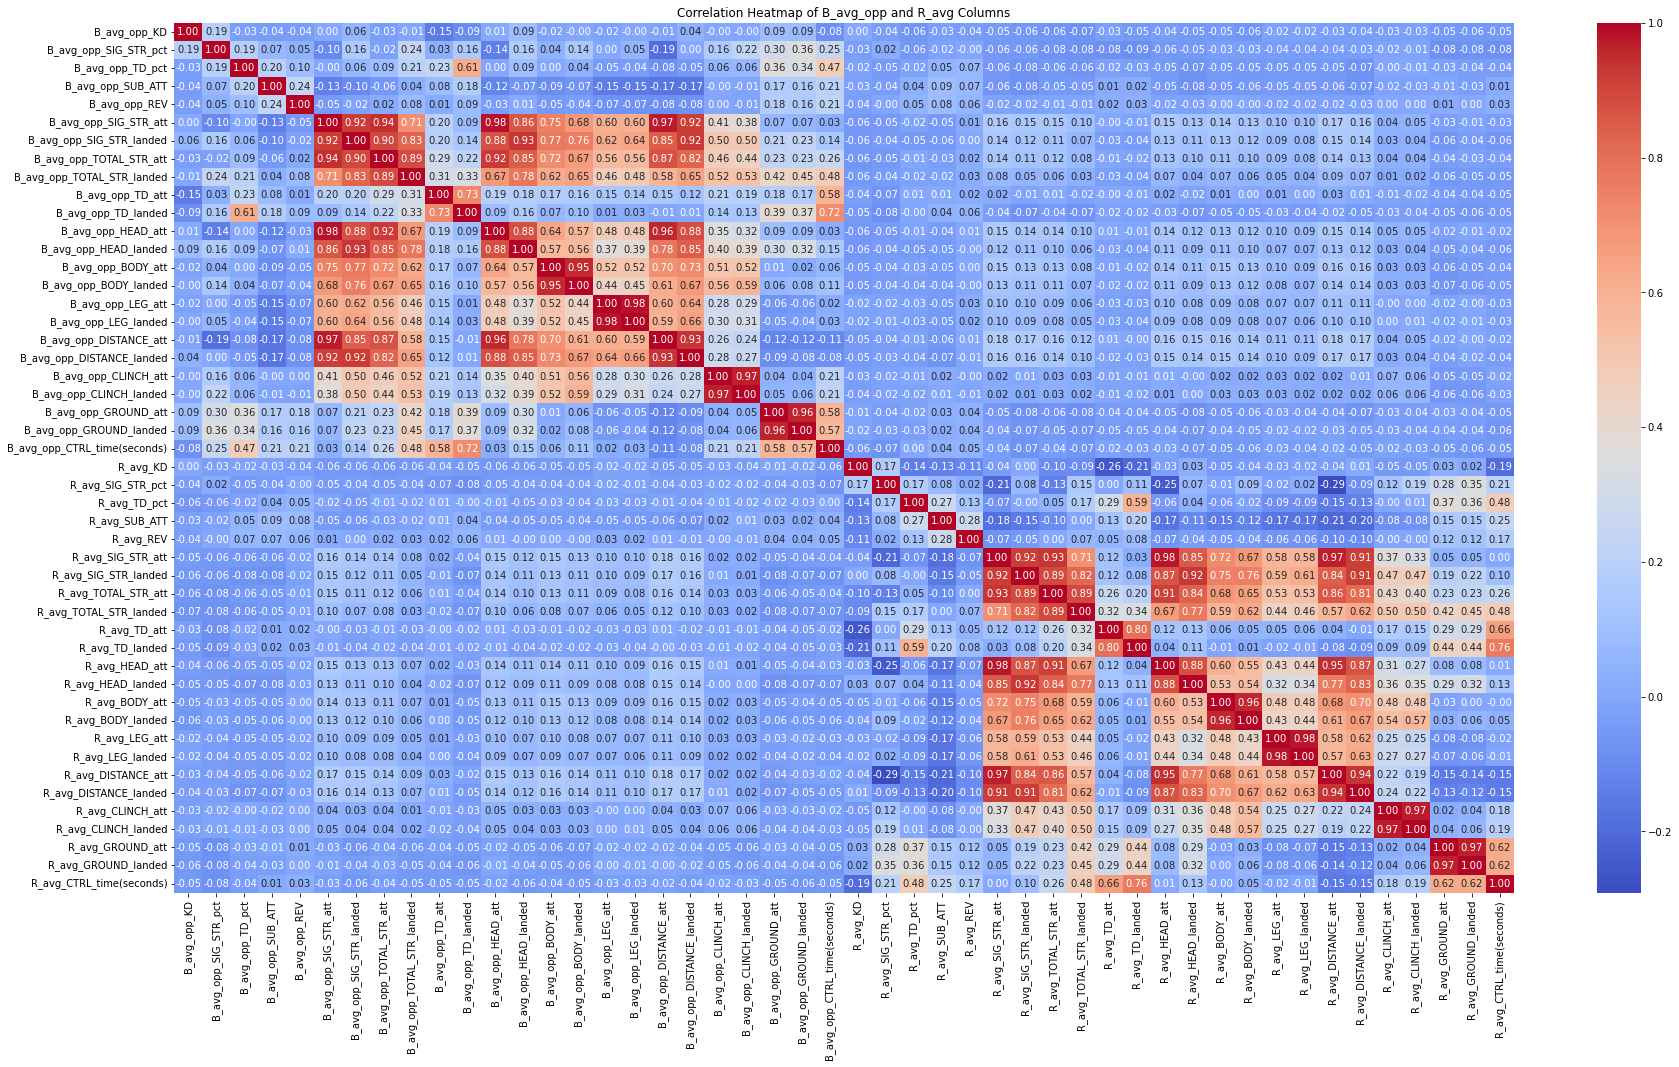

In [20]:
# Filter columns that start with 'B_avg_opp'
B_avg_opp_columns = [col for col in df_no_null.columns if col.startswith('B_avg_opp')]

# Filter columns that start with 'R_avg'
R_avg_columns = [col for col in df_no_null.columns if col.startswith('R_avg') and not col.startswith('R_avg_opp')]

# Concatenate the two lists of columns
selected_columns = B_avg_opp_columns + R_avg_columns

# Select the corresponding columns from the DataFrame
selected_df = df_no_null[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of B_avg_opp and R_avg Columns')
plt.show()


As we can see here we don't have any possitive correlation.

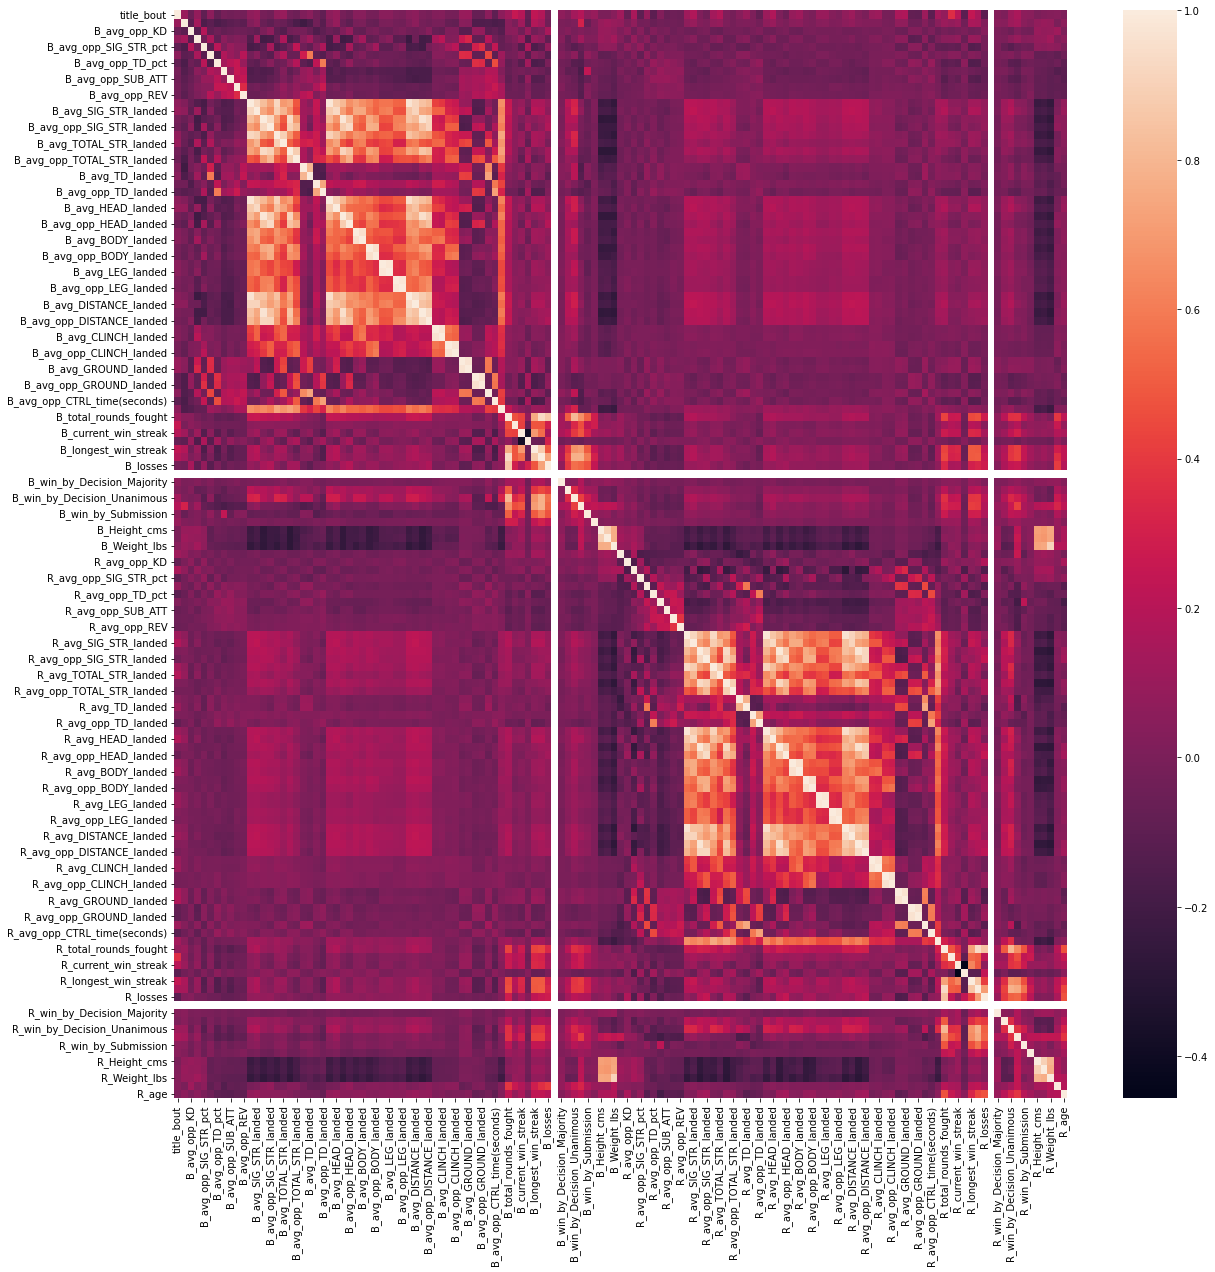

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

plt.show()

#### Target Variable "Winner" Distribution 

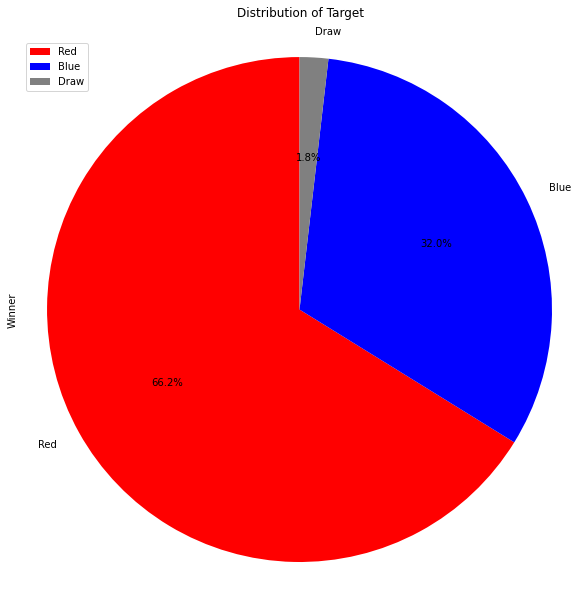

In [22]:
# Set the figure size
plt.figure(figsize=(10, 10))

#Define custom colors for each category 
colors = {'Blue': 'blue',
          'Red': 'red',
          'Draw': 'grey'}

# Plot pie chart
df['Winner'].value_counts().plot(kind='pie', 
                                 autopct='%1.1f%%', 
                                 startangle=90, 
                                 colors=[colors.get(label, 'green') for label in df['Winner'].unique()])
plt.title('Distribution of Target\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

We can see here that "Draws" are incredibly rare. Since the "Winner" variable is going to be our target, we are dealing with multi-class classification problem, but to simplify it, "Draws" should be removed from the target variable so it becomes a binary classification task.

### Ideas for Visualisation

With a dataset containing a wide range of features like the one you provided, there are several potential avenues for visualization and analysis. Here are a few ideas to get you started:

* Winner Distribution: Visualize the distribution of winners ('Winner' column). This can give insights into whether certain factors or fighter characteristics contribute to winning more often.
* Fighter Characteristics: Explore the distribution of various fighter characteristics such as height, weight, reach, age, and stance. You can visualize these distributions using histograms or box plots and compare them between winning and losing fighters.
* Fight Outcomes by Weight Class: Analyze the distribution of fight outcomes (win/loss) across different weight classes ('weight_class' column). This can reveal whether certain weight classes have higher win rates or are more competitive.
* Fight Statistics: Explore the average fight statistics (e.g., significant strikes, takedowns, knockdowns) for winning and losing fighters. Visualize these using histograms or box plots to identify differences in performance between winners and losers.
* Stance Analysis: Investigate the impact of fighter stance ('B_Stance' and 'R_Stance' columns) on fight outcomes. Compare the win rates and performance metrics of fighters with different stances.
* Title Bout Analysis: Analyze the frequency and outcomes of title bouts ('title_bout' column). Visualize the distribution of wins and losses in title bouts compared to non-title bouts.
* Correlation Analysis: Compute the correlation matrix between different numerical features in the dataset and visualize it using a heatmap. This can help identify relationships and dependencies between variables.
* Time Series Analysis: If the 'date' column contains temporal data, you can perform time series analysis to examine trends and patterns in fight outcomes or fighter characteristics over time.

## CRISP-DM: 3. Data Preparation

### Dealing with NaNs

In [23]:
# Returns the column names along with the number of NaN values in that particular column
def show_null_columns(df):
    for column in df.columns:
        if df[column].isnull().sum()!=0:
            print(f"Nan in {column}: {df[column].isnull().sum()}")

show_null_columns(df)

Nan in Referee: 32
Nan in B_avg_KD: 1427
Nan in B_avg_opp_KD: 1427
Nan in B_avg_SIG_STR_pct: 1427
Nan in B_avg_opp_SIG_STR_pct: 1427
Nan in B_avg_TD_pct: 1427
Nan in B_avg_opp_TD_pct: 1427
Nan in B_avg_SUB_ATT: 1427
Nan in B_avg_opp_SUB_ATT: 1427
Nan in B_avg_REV: 1427
Nan in B_avg_opp_REV: 1427
Nan in B_avg_SIG_STR_att: 1427
Nan in B_avg_SIG_STR_landed: 1427
Nan in B_avg_opp_SIG_STR_att: 1427
Nan in B_avg_opp_SIG_STR_landed: 1427
Nan in B_avg_TOTAL_STR_att: 1427
Nan in B_avg_TOTAL_STR_landed: 1427
Nan in B_avg_opp_TOTAL_STR_att: 1427
Nan in B_avg_opp_TOTAL_STR_landed: 1427
Nan in B_avg_TD_att: 1427
Nan in B_avg_TD_landed: 1427
Nan in B_avg_opp_TD_att: 1427
Nan in B_avg_opp_TD_landed: 1427
Nan in B_avg_HEAD_att: 1427
Nan in B_avg_HEAD_landed: 1427
Nan in B_avg_opp_HEAD_att: 1427
Nan in B_avg_opp_HEAD_landed: 1427
Nan in B_avg_BODY_att: 1427
Nan in B_avg_BODY_landed: 1427
Nan in B_avg_opp_BODY_att: 1427
Nan in B_avg_opp_BODY_landed: 1427
Nan in B_avg_LEG_att: 1427
Nan in B_avg_LEG_lande


* __Referee and Location__ columns don't look like an important column. Let's delete them.
* __Date__ of the fight is also not essential.
* __Draws__ are incredibly rare and should be removed from the target variable so it becomes a binary classification task
* __Fighter names__ are also need to be removed, since they don't have a value for us, unlike their stats.
* Let's see if __Height and Reach__ have a correlation
* The rest i.e. __Age and Stance__, let's fill with the median of that column.
* We could replace the missing values with median/mode in the columns with fighters average stats, but it would affect on the data shape, so we will just drop them, since these rows do not provide us any information about the fighters stats, and for our further model we need to focus on more complete and reliable data. This can lead to more accurate predictions and insights regarding UFC fight outcomes.
* Also filling it with median/mode would increase the risk of the biased or misleading results.


In [24]:
df_dropped = df.copy()

In [25]:
def column_value_counts(df, column):
        print(df[column].value_counts())

####  Droping rows where the value of the "Winner" column is equal to "Draw"

In [26]:
column_value_counts(df_dropped, "Winner")

Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64


In [27]:
df_dropped.drop(df_dropped.index[df_dropped['Winner'] == 'Draw'], inplace=True)

In [28]:
column_value_counts(df_dropped, "Winner")

Red     3979
Blue    1923
Name: Winner, dtype: int64


#### Droping "Referee" , "location", "date" and "R/B_fighters" columns

In [29]:
column_value_counts(df_dropped, 'Referee')

Herb Dean                 844
John McCarthy             622
Dan Miragliotta           392
Mario Yamasaki            388
Marc Goddard              340
Yves Lavigne              263
Steve Mazzagatti          199
Leon Roberts              191
Keith Peterson            189
Jason Herzog              174
Chris Tognoni             156
Mark Smith                144
Josh Rosenthal            120
Kevin MacDonald            80
Steve Perceval             76
John Sharp                 74
Jerin Valel                73
Kevin Mulhall              60
Kerry Hatley               48
Osiris Maia                46
Neil Hall                  42
Kim Winslow                42
Kevin Sataki               41
Todd Ronald Anderson       39
Larry Landless             37
Mike Beltran               36
Jacob Montalvo             35
Greg Kleynjans             34
Gary Copeland              31
Lukasz Bosacki             31
Eduardo Herdy              31
Grant Waterman             30
Rich Mitchell              29
Blake Gric

In [30]:
column_value_counts(df_dropped, 'location')

Las Vegas, Nevada, USA                         1535
Abu Dhabi, Abu Dhabi, United Arab Emirates      153
London, England, United Kingdom                 111
Newark, New Jersey, USA                          88
Anaheim, California, USA                         82
Montreal, Quebec, Canada                         80
Chicago, Illinois, USA                           79
Atlantic City, New Jersey, USA                   78
Los Angeles, California, USA                     75
Toronto, Ontario, Canada                         74
Stockholm, Sweden                                72
Boston, Massachusetts, USA                       71
Rio de Janeiro, Brazil                           68
Houston, Texas, USA                              65
Denver, Colorado, USA                            64
Dallas, Texas, USA                               62
Sacramento, California, USA                      60
Sao Paulo, Sao Paulo, Brazil                     60
Nashville, Tennessee, USA                        59
Mexico City,

In [31]:
column_value_counts(df_dropped, 'date')

2016-11-19    24
2014-10-04    22
2014-05-31    22
2014-08-23    21
2014-06-28    21
1994-03-11    15
2021-03-06    15
2021-01-20    14
2020-07-25    14
2019-10-12    14
2018-04-14    14
2016-06-18    13
2019-09-28    13
2018-08-25    13
2019-08-10    13
2016-04-10    13
2018-07-28    13
2018-07-22    13
2016-02-27    13
2016-02-21    13
2019-07-20    13
2018-07-14    13
2016-01-17    13
2019-11-09    13
2018-06-23    13
2019-12-14    13
2019-12-21    13
2016-05-08    13
2013-09-21    13
2015-11-21    13
2016-11-26    13
2019-01-19    13
2019-02-02    13
2016-11-05    13
2018-11-30    13
2019-02-23    13
2013-08-17    13
2019-03-09    13
2019-03-30    13
2018-09-08    13
2019-04-13    13
2019-04-27    13
2018-10-27    13
2019-05-18    13
2019-06-08    13
2018-09-22    13
2016-12-17    13
2018-12-08    13
2013-05-18    13
2014-05-10    13
2017-04-15    13
2017-11-11    13
2017-11-18    13
2017-12-02    13
2017-12-09    13
2017-07-22    13
2020-10-10    13
2017-06-25    13
2009-09-19    

In [32]:
df_dropped.drop(columns=['Referee', 'date','location', 'R_fighter', 'B_fighter'], inplace=True)

In [33]:
df_dropped.head()

,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7.0000,4.500,1.50,0.50,219.50,24.5000,577.5,4,0,2,0,2,2,0,0,0,1,0,1,0,0,Orthodox,187.96,193.04,205.0,1.031250,0.062500,0.576875,0.381250,0.406250,0.11625,0.250000,1.18750,0.37500,0.25,77.562500

#### Droping "R/B_win_by_TKO_Doctor_Stoppage" column

In [34]:
column_value_counts(df_dropped, 'R_win_by_TKO_Doctor_Stoppage')

0    5522
1     348
2      32
Name: R_win_by_TKO_Doctor_Stoppage, dtype: int64


In [35]:
column_value_counts(df_dropped, 'B_win_by_TKO_Doctor_Stoppage')

0    5666
1     223
2      13
Name: B_win_by_TKO_Doctor_Stoppage, dtype: int64


In [36]:
df_dropped.drop(columns=['R_win_by_TKO_Doctor_Stoppage', 'B_win_by_TKO_Doctor_Stoppage'], inplace=True)

In [37]:
df_dropped.head()


,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7.0000,4.500,1.50,0.50,219.50,24.5000,577.5,4,0,2,0,2,2,0,0,0,1,0,1,0,Orthodox,187.96,193.04,205.0,1.031250,0.062500,0.576875,0.381250,0.406250,0.11625,0.250000,1.18750,0.37500,0.25,77.562500,43.156250,69.15625,27.593750,93.125000,57.218750,98.343750,52.4

#### Correlation between 'Height' and 'Reach'

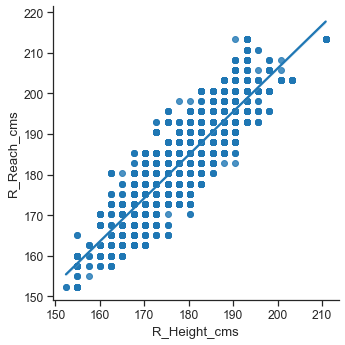

In [38]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('R_Height_cms', # Horizontal axis
           'R_Reach_cms', # Vertical axis
           data=df_dropped, # Data source
           fit_reg=True # fix a regression line
           ) # S marker size

* We can see there is a positive correlation between height and reach. So we'll replace reach with height

In [39]:
#Fills missing values in the Reach_cms column with Height_cms value
df_dropped['R_Reach_cms'].fillna(df_dropped['R_Height_cms'], inplace=True)
df_dropped['B_Reach_cms'].fillna(df_dropped['B_Height_cms'], inplace=True)

#### Filling 'Age', 'Stance' with the median of that column.

In [40]:
df_dropped['B_Stance'].value_counts()

Orthodox       4453
Southpaw       1140
Switch          235
Open Stance       9
Sideways          4
Name: B_Stance, dtype: int64

In [41]:
df_dropped['R_Stance'].value_counts()

Orthodox       4451
Southpaw       1210
Switch          195
Open Stance      15
Sideways          2
Name: R_Stance, dtype: int64

In [42]:
df_dropped['R_Stance'].fillna('Orthodox', inplace=True)
df_dropped['B_Stance'].fillna('Orthodox', inplace=True)

In [43]:
# Fill missing values with the median
df_dropped['B_age'].fillna(df_dropped['B_age'].median(), inplace=True)

In [44]:
# Fill missing values with the median
df_dropped['R_age'].fillna(df_dropped['R_age'].median(), inplace=True)

In [45]:
show_null_columns(df_dropped)

Nan in B_avg_KD: 1395
Nan in B_avg_opp_KD: 1395
Nan in B_avg_SIG_STR_pct: 1395
Nan in B_avg_opp_SIG_STR_pct: 1395
Nan in B_avg_TD_pct: 1395
Nan in B_avg_opp_TD_pct: 1395
Nan in B_avg_SUB_ATT: 1395
Nan in B_avg_opp_SUB_ATT: 1395
Nan in B_avg_REV: 1395
Nan in B_avg_opp_REV: 1395
Nan in B_avg_SIG_STR_att: 1395
Nan in B_avg_SIG_STR_landed: 1395
Nan in B_avg_opp_SIG_STR_att: 1395
Nan in B_avg_opp_SIG_STR_landed: 1395
Nan in B_avg_TOTAL_STR_att: 1395
Nan in B_avg_TOTAL_STR_landed: 1395
Nan in B_avg_opp_TOTAL_STR_att: 1395
Nan in B_avg_opp_TOTAL_STR_landed: 1395
Nan in B_avg_TD_att: 1395
Nan in B_avg_TD_landed: 1395
Nan in B_avg_opp_TD_att: 1395
Nan in B_avg_opp_TD_landed: 1395
Nan in B_avg_HEAD_att: 1395
Nan in B_avg_HEAD_landed: 1395
Nan in B_avg_opp_HEAD_att: 1395
Nan in B_avg_opp_HEAD_landed: 1395
Nan in B_avg_BODY_att: 1395
Nan in B_avg_BODY_landed: 1395
Nan in B_avg_opp_BODY_att: 1395
Nan in B_avg_opp_BODY_landed: 1395
Nan in B_avg_LEG_att: 1395
Nan in B_avg_LEG_landed: 1395
Nan in B_av

### Removing Fighters Stats with Missing Values

In [46]:
# Drop rows with missing values
df_dropped = df_dropped.dropna()

# Check the shape of the DataFrame before and after dropping missing values
print("Shape before dropping missing values:", df.shape)
print("Shape after dropping missing values:", df_dropped.shape)

Shape before dropping missing values: (6012, 144)
Shape after dropping missing values: (4240, 137)


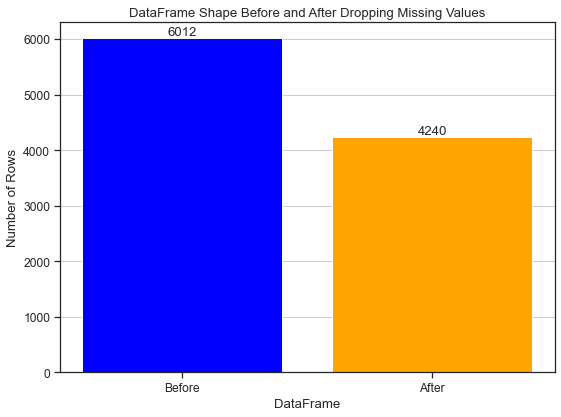

In [47]:
# Data
labels = ['Before', 'After']
values = [df.shape[0], df_dropped.shape[0]]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'])

# Annotate points
for label, value in zip(labels, values):
    plt.text(label, value, str(value), ha='center', va='bottom')

# Title and labels
plt.title('DataFrame Shape Before and After Dropping Missing Values')
plt.xlabel('DataFrame')
plt.ylabel('Number of Rows')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [48]:
df_dropped.isnull().sum()

Winner                          0
title_bout                      0
weight_class                    0
B_avg_KD                        0
B_avg_opp_KD                    0
B_avg_SIG_STR_pct               0
B_avg_opp_SIG_STR_pct           0
B_avg_TD_pct                    0
B_avg_opp_TD_pct                0
B_avg_SUB_ATT                   0
B_avg_opp_SUB_ATT               0
B_avg_REV                       0
B_avg_opp_REV                   0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_opp_SIG_STR_att           0
B_avg_opp_SIG_STR_landed        0
B_avg_TOTAL_STR_att             0
B_avg_TOTAL_STR_landed          0
B_avg_opp_TOTAL_STR_att         0
B_avg_opp_TOTAL_STR_landed      0
B_avg_TD_att                    0
B_avg_TD_landed                 0
B_avg_opp_TD_att                0
B_avg_opp_TD_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_opp_HEAD_att              0
B_avg_opp_HEAD_landed           0
B_avg_BODY_att

As we can see there are no more missing values in the data set. 

In [49]:
df_dropped.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 6001
Data columns (total 137 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    Winner                        4240 non-null   object 
 1    title_bout                    4240 non-null   bool   
 2    weight_class                  4240 non-null   object 
 3    B_avg_KD                      4240 non-null   float64
 4    B_avg_opp_KD                  4240 non-null   float64
 5    B_avg_SIG_STR_pct             4240 non-null   float64
 6    B_avg_opp_SIG_STR_pct         4240 non-null   float64
 7    B_avg_TD_pct                  4240 non-null   float64
 8    B_avg_opp_TD_pct              4240 non-null   float64
 9    B_avg_SUB_ATT                 4240 non-null   float64
 10   B_avg_opp_SUB_ATT             4240 non-null   float64
 11   B_avg_REV                     4240 non-null   float64
 12   B_avg_opp_REV                 4240 non-null   

### Using pandas describe() to find outliers

In [50]:
df_dropped.dtypes

Winner                           object
title_bout                         bool
weight_class                     object
B_avg_KD                        float64
B_avg_opp_KD                    float64
B_avg_SIG_STR_pct               float64
B_avg_opp_SIG_STR_pct           float64
B_avg_TD_pct                    float64
B_avg_opp_TD_pct                float64
B_avg_SUB_ATT                   float64
B_avg_opp_SUB_ATT               float64
B_avg_REV                       float64
B_avg_opp_REV                   float64
B_avg_SIG_STR_att               float64
B_avg_SIG_STR_landed            float64
B_avg_opp_SIG_STR_att           float64
B_avg_opp_SIG_STR_landed        float64
B_avg_TOTAL_STR_att             float64
B_avg_TOTAL_STR_landed          float64
B_avg_opp_TOTAL_STR_att         float64
B_avg_opp_TOTAL_STR_landed      float64
B_avg_TD_att                    float64
B_avg_TD_landed                 float64
B_avg_opp_TD_att                float64
B_avg_opp_TD_landed             float64


In [51]:
df_dropped.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.0,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.0,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.

In [52]:
B_fighters_columns.clear()
for column in df_dropped.columns:
        if column.startswith('B_'):
            B_fighters_columns.append(column)

In [53]:
R_fighters_columns.clear()
for column in df_dropped.columns:
        if column.startswith('R_'):
            R_fighters_columns.append(column)

In [54]:
def box_plot_for_numerical_columns(df, columns_list): 
    
    # Create box plots for numerical columns
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[columns_list])
    plt.xticks(rotation=90)
    plt.title('Boxplot of Numerical Columns to Identify Outliers')
    plt.show()

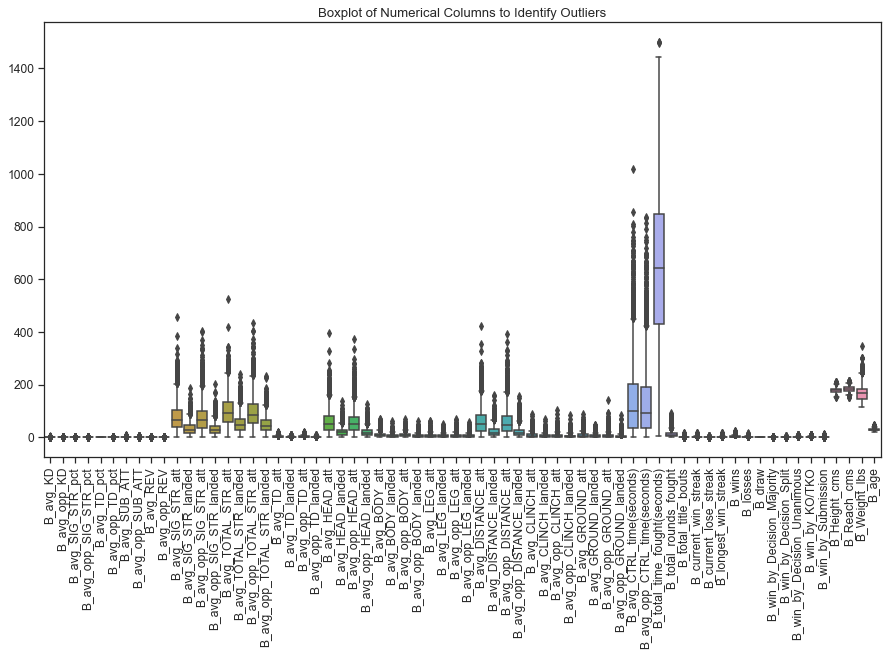

In [55]:
box_plot_for_numerical_columns(df_dropped, B_fighters_columns)

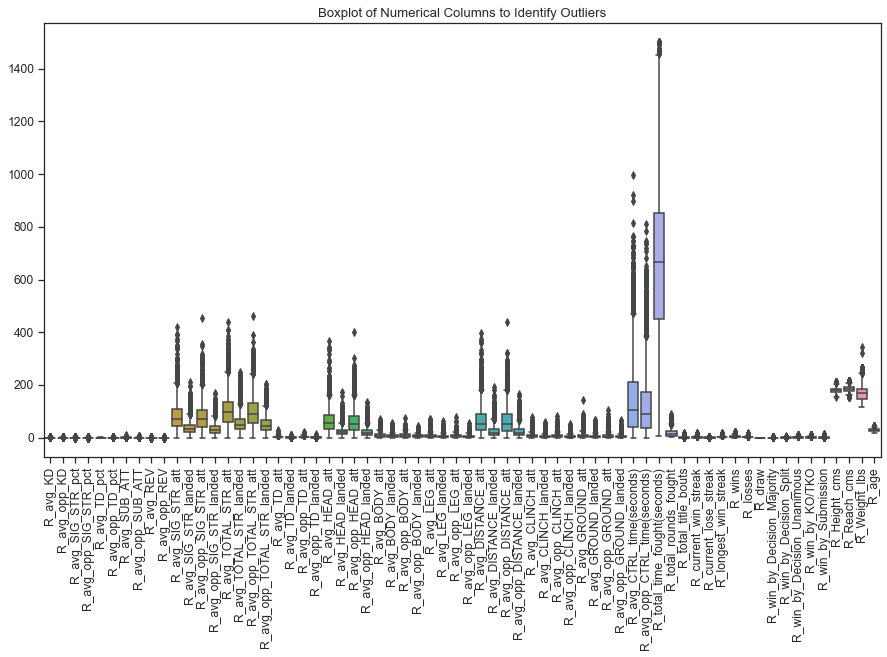

In [56]:
box_plot_for_numerical_columns(df_dropped, R_fighters_columns)

* As we can see, a lot of columns have outliers. For example, the max B_avg_KD is 5.0 while its mean is 0.253647. The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier. Similarly, to the other columns, I won't mention all of them. 
* Due to the nature of this data, namely that it represents the statistics of each individual fighter, it is not surprising that the data range is so different. 
* To justify these data, we take into account the fact that UFC has a very big roster of different and the most unique fighters. Some of them are a truly unique, some of them have not had many fights and just started their professional career. There are also a lot of the fighters that have been in the promotion for ages and had enormous amount of fights. So I would say that these are justifiable outliers. Since they have a valid reason to be different from the median of the data. 

In [57]:
df_dropped.head(5)

,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,0.000000,0.00,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.000000,6.500000,39.500000,11.000000,63.000000,27.500000,7.500000,7.000000,12.00000,9.000000,3.000000,2.000000,9.000000,8.500000,35.000000,12.500000,43.500000,17.500000,10.50000,4.500000,4.000000,3.000000,4.50000,3.000000,36.500000,24.500000,34.000000,277.500000,531.50000,4,0,0,1,1,1,1,0,0,0,0,0,1,Orthodox,165.10,170.18,135.0,1.00000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Red,False,Middleweight,0.500000,0.000,0.660000,0.305000,0.300000,0.500000,1.500000,0.0000,0.000000,0.00,65.500000,35.000000,50.000000,16.500000,113.500000,68.500000,68.500000,29.000000,2.500000,1.500000,0.500000,0.500000,46.000000,20.000000,36.000000,7.500000,12.000000,8.000000,8.00000,3.000000,7.500000,7.000000,6.000000,6.000000,58.000000,30.000000,48.000000,15.500000,0.50000,0.500000,0.500000,0.500000,7.00000,4.500000,1.500

In [58]:
df_dropped.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 6001
Data columns (total 137 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    Winner                        4240 non-null   object 
 1    title_bout                    4240 non-null   bool   
 2    weight_class                  4240 non-null   object 
 3    B_avg_KD                      4240 non-null   float64
 4    B_avg_opp_KD                  4240 non-null   float64
 5    B_avg_SIG_STR_pct             4240 non-null   float64
 6    B_avg_opp_SIG_STR_pct         4240 non-null   float64
 7    B_avg_TD_pct                  4240 non-null   float64
 8    B_avg_opp_TD_pct              4240 non-null   float64
 9    B_avg_SUB_ATT                 4240 non-null   float64
 10   B_avg_opp_SUB_ATT             4240 non-null   float64
 11   B_avg_REV                     4240 non-null   float64
 12   B_avg_opp_REV                 4240 non-null   

In [59]:
df_dropped.sample(5)

,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
2323,Blue,False,Bantamweight,0.0,0.75,0.4200,0.3350,0.1650,0.415,2.00,0.0,0.0,0.0,107.00,51.25,218.25,70.25,120.75,65.00,226.50,77.50,2.75,0.50,3.75,2.0,91.75,40.5,197.00,54.0,5.00,3.50,12.50,9.0,10.25,7.25,8.75,7.25,103.50,49.25,202.00,60.75,1.5,0.00,7.25,3.75,2.0,2.0,9.00,5.75,7.0,183.0,809.25,9,1,0,3,0,0,3,0,0,0,0,0,0,Orthodox,167.64,165.10,135.0,0.125000,0.000000,0.367500,0.410000,0.468750,0.220000,0.125000,1.000000,0.875000,0.62500,111.750000,41.250000,110.750000,45.875000,138.750000,67.375000,155.875000,82.125000,3.500000,1.875000,5.750000,1.000000,102.500000,34.500000,89.000000,32.125000,8.000000,5.500000,12.500000,8.000000,1.250000,1.250000,9.250000,5.750000,78.125000,20.875000,92.875000,34.000000,12.500000,7.250000,8.375000,5.000000,21.125000,13.125000,9.500000,6.875000,285.750000,110.250000,838.875000,11,0,2,0,2,2,2,0,0,0,1,1,0,Orthodox,170.18,175.26,125.0,29.0,30.0
3810,Red,False,Welterweight,1.0,0.00,0.7500,0.0000,0.0000,0.000,0.00,0.0,0.0,0.0,4.00,3.00,2.00,0.00,4.00,3.00,2.00,0.00,0.00,0.00,0.00,0.0,4.00,3.0,2.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,4.00,3.00,2.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,2.0,0.0,42.00,1,0,1,0,1,1,0,0,0,0,0,1,0,Orthodox,180.34,185.42,170.0,0.125000,0.062500,0.620410,0.430781,0.409746,0.116914,1.017578,0.101562,0.039062,0.09375,40.769531,21.224609,25.646484,7.394531,75.669922,50.623047,32.417969,13.638672,4.001953,2.050781,1.132812,0.298828,31.546875,15.380859,20.410156,3.863281,2.386719,1.199219,2.5

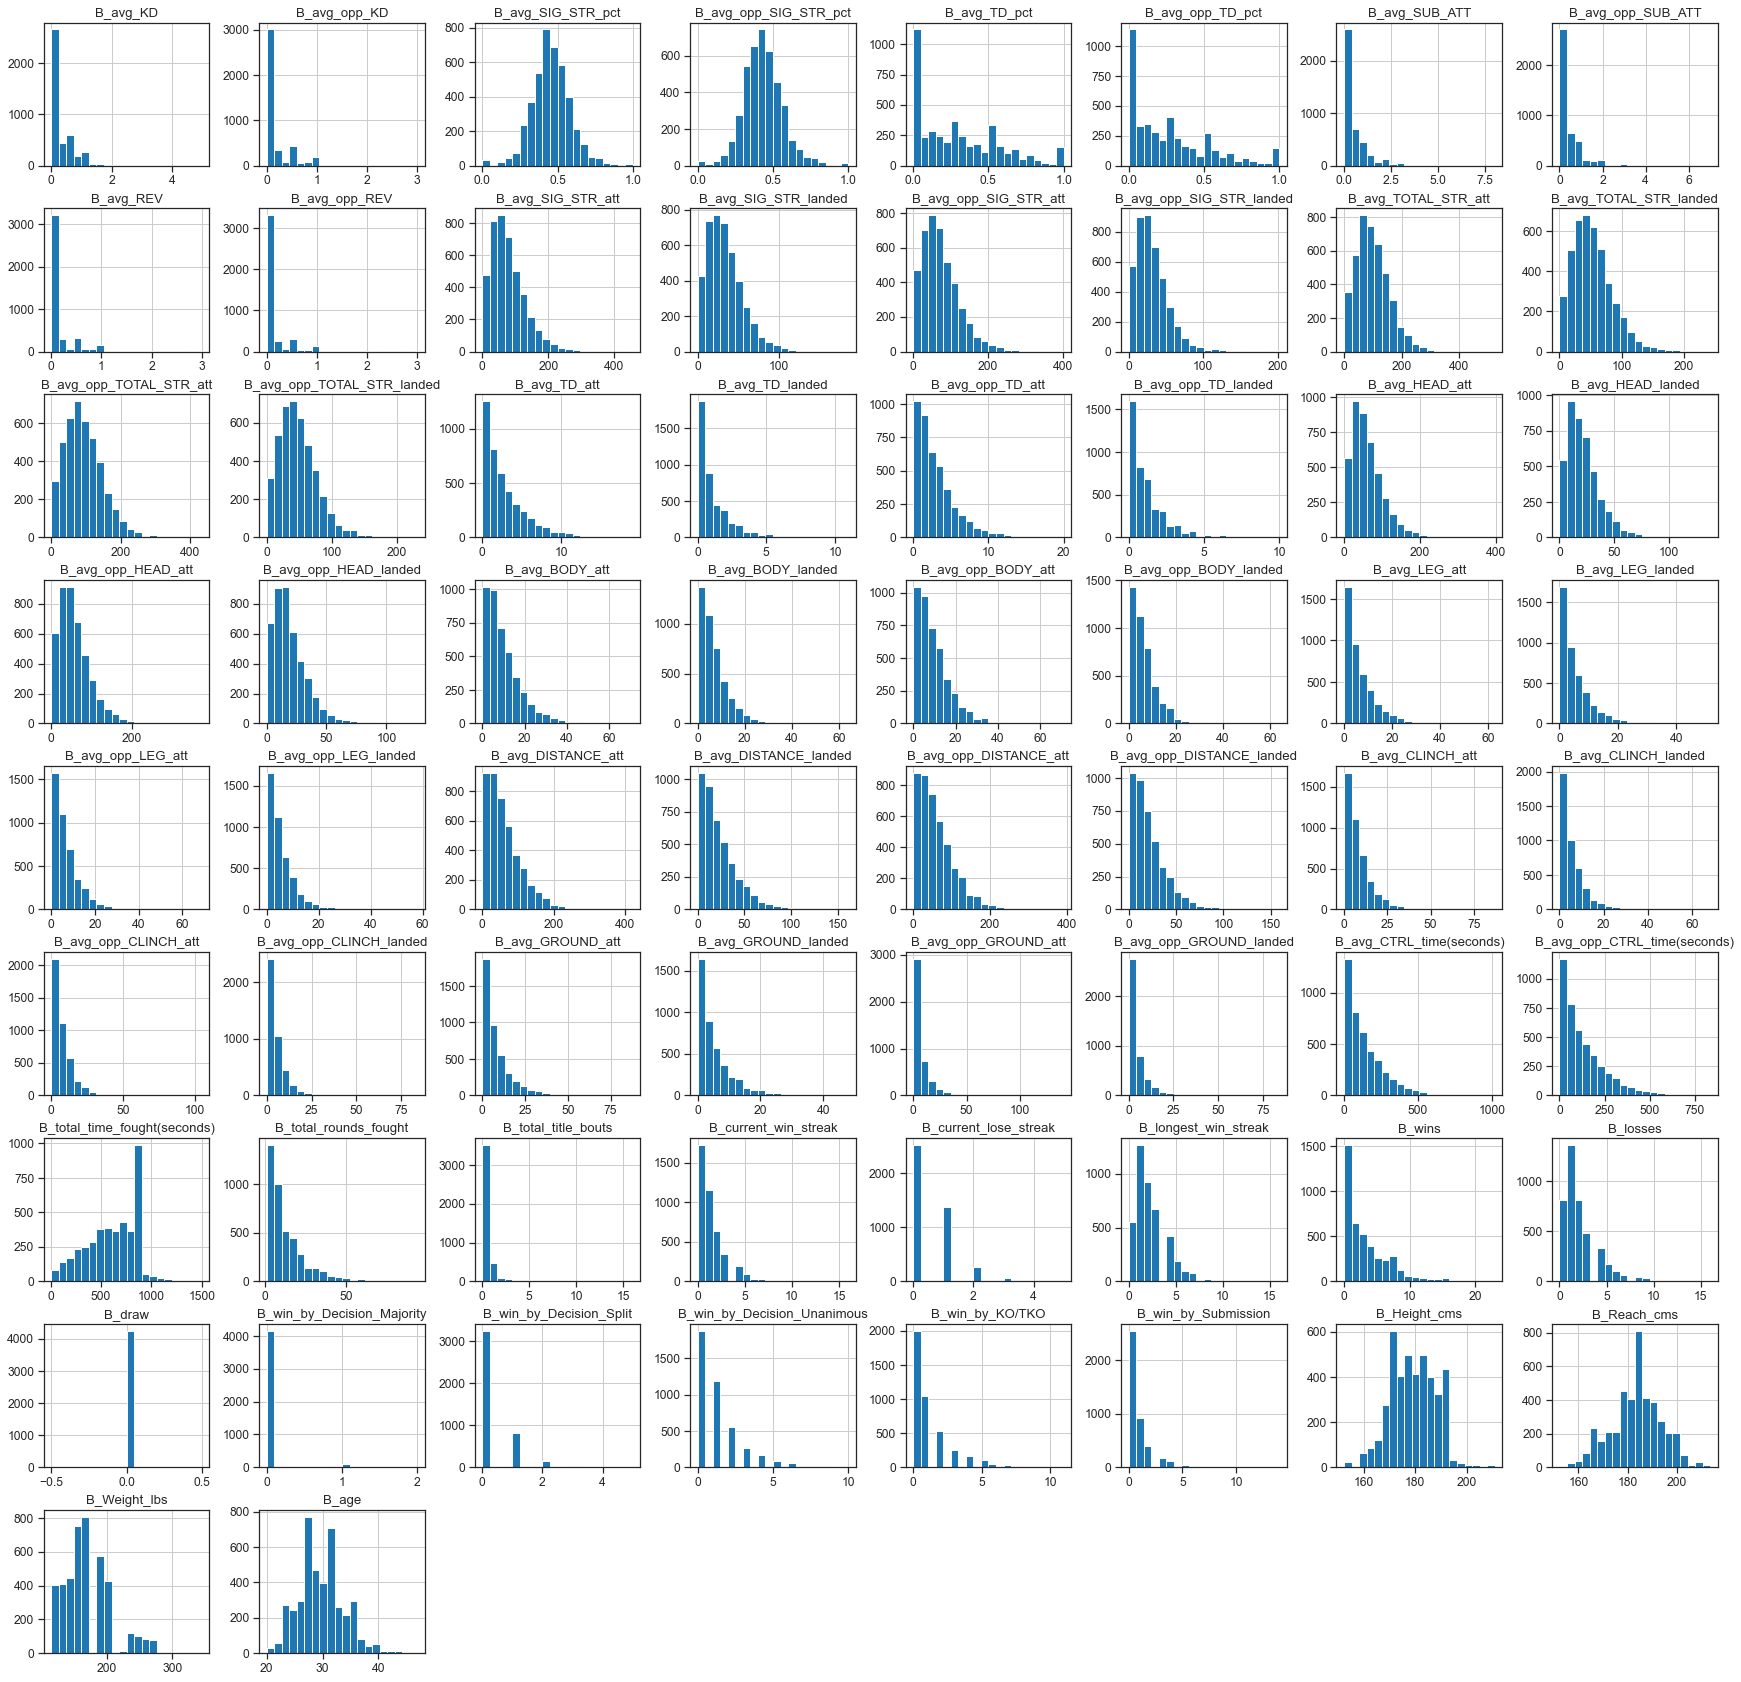

In [60]:
df_dropped[B_fighters_columns].hist(figsize=(30,30), bins=20)
plt.show()

### Scale Numerical Data 

Because clustering is distance based, we need to scale the data so that the distance between the data points is not skewed by the magnitude of the data. As our data is not Gaussian distributed, and does contain outliers (that are justifiable), we will use the RobustScaler to scale our data

In [61]:
# Select numerical columns
numerical_columns = df_dropped.select_dtypes(include=['float64', 'int64']).columns

# initialize the RobustScaler
scaler = RobustScaler()

#Making copy of our df
df_scaled = df_dropped.copy()

# fit the scaler and transform the data
df_scaled[numerical_columns] = scaler.fit_transform(df_dropped[numerical_columns])

In [62]:
df_scaled.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.0,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.0,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.

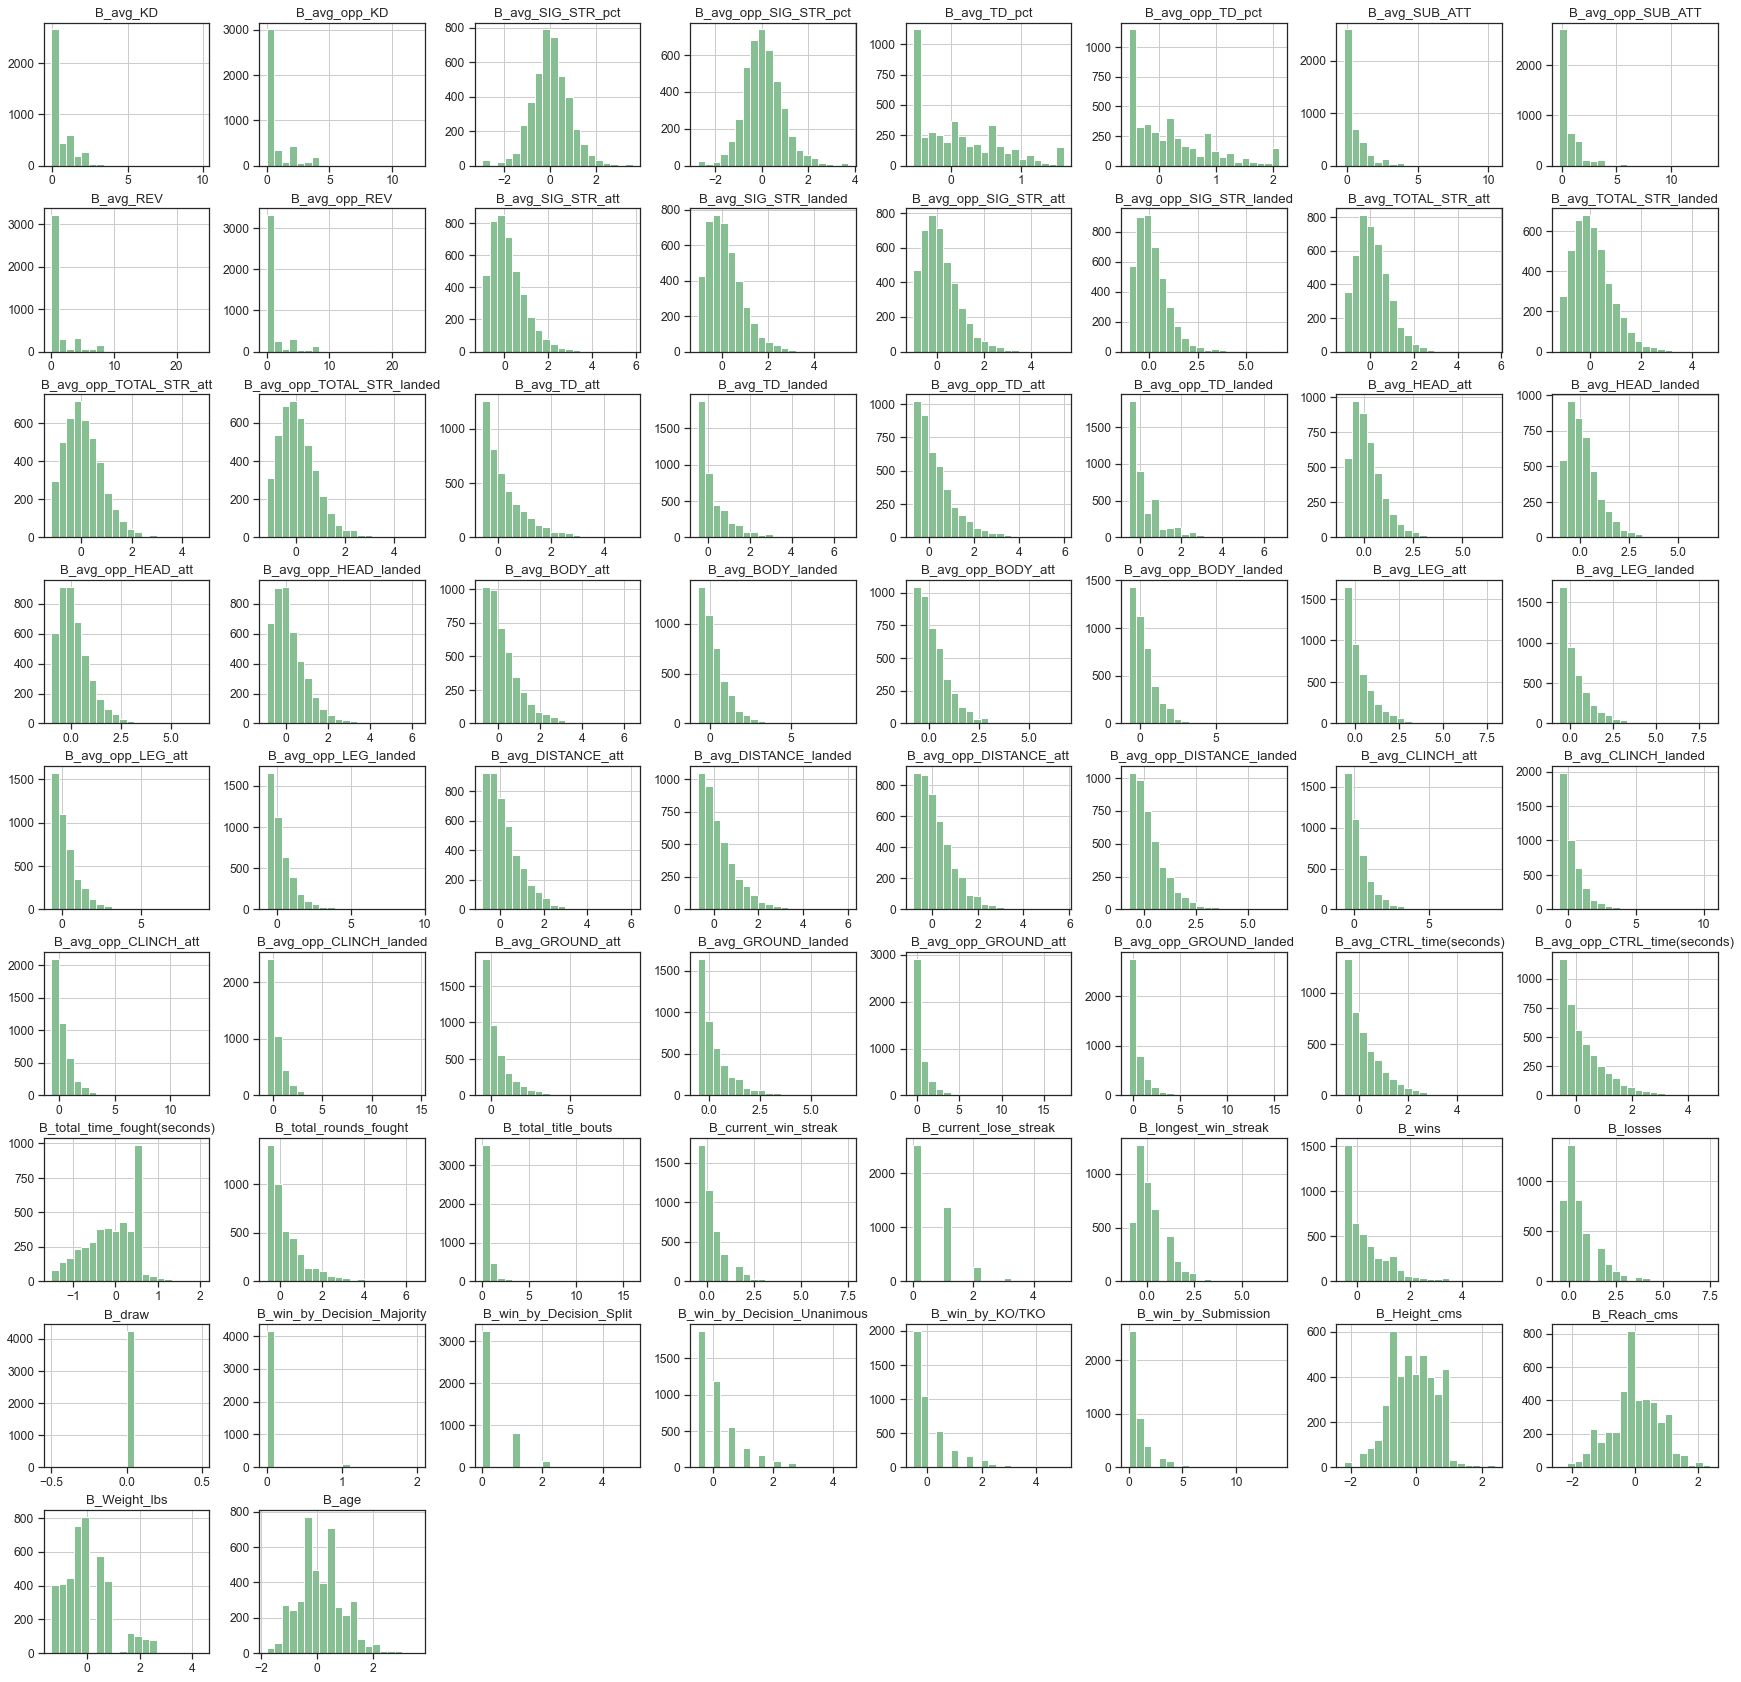

In [64]:
df_scaled[B_fighters_columns].hist(figsize=(30,30), bins=20, color='#86bf91')
plt.show()

Using one-hot encoding on the target variable (also known as dummy encoding) is generally not recommended for classification tasks because it can introduce issues and complexities that may adversely affect the performance of machine learning algorithms.

### Encoding 

In [65]:
# Select categorical columns
cat_columns = df_scaled.select_dtypes(include=['object', 'bool']).columns

In [66]:
cat_columns


Index(['Winner', 'title_bout', 'weight_class', 'B_Stance', 'R_Stance'], dtype='object')

In [68]:
from sklearn.preprocessing import LabelEncoder

# Create an empty dictionary to store label mappings
le_map = {}

label_encoder = LabelEncoder()

In [69]:
# Perform label encoding on the categorical columns
for column in cat_columns:
    if column != 'weight_class':
        
        df_scaled[column] = label_encoder.fit_transform(df_scaled[column])

        # Store the mapping in the dictionary
        le_map[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping for each column
for column, mapping in le_map.items():
    print(f"Mapping for column '{column}': {mapping}")

Mapping for column 'Winner': {'Blue': 0, 'Red': 1}
Mapping for column 'title_bout': {False: 0, True: 1}
Mapping for column 'B_Stance': {'Open Stance': 0, 'Orthodox': 1, 'Sideways': 2, 'Southpaw': 3, 'Switch': 4}
Mapping for column 'R_Stance': {'Open Stance': 0, 'Orthodox': 1, 'Southpaw': 2, 'Switch': 3}


In [70]:
weight_class_encoding = {
    'Heavyweight': 13,
    'LightHeavyweight': 12,
     'Middleweight': 11,
     'Welterweight': 10,
    'Lightweight': 9,
    'Featherweight': 8,
    'Bantamweight': 7,
     'Flyweight': 6,
    'CatchWeight': 5,
    'OpenWeight':4 ,
    'WomenFeatherweight': 3,
    'WomenBantamweight': 2,
    'WomenFlyweight': 1,
    'WomenStrawweight': 0
}

In [71]:
# Create a new column with encoded values based on custom mapping
df_scaled['weight_class_encoded'] = df_scaled['weight_class'].map(weight_class_encoding)

# Print the mapping
print(weight_class_encoding)

{'Heavyweight': 13, 'LightHeavyweight': 12, 'Middleweight': 11, 'Welterweight': 10, 'Lightweight': 9, 'Featherweight': 8, 'Bantamweight': 7, 'Flyweight': 6, 'CatchWeight': 5, 'OpenWeight': 4, 'WomenFeatherweight': 3, 'WomenBantamweight': 2, 'WomenFlyweight': 1, 'WomenStrawweight': 0}


In [72]:
df_scaled.sample(5)

,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_encoded
2212,0,0,Lightweight,-0.062366,0.062500,-0.483340,-0.815629,0.642506,-0.007446,0.103192,0.138348,1.265554,0.015636,-0.220759,-0.256461,-0.270774,-0.364541,-0.392662,-0.461877,-0.374886,-0.420001,-0.284191,-0.066753,0.317456,0.064653,-0.154137,-0.167640,-0.237755,-0.222721,-0.312716,-0.263812,-0.066127,-0.165424,-0.038903,-0.007879,-0.368439,-0.423051,-0.147888,-0.023856,-0.100057,-0.126365,-0.402366,-0.400680,-0.463422,-0.425428,0.533035,0.179038,-0.003820,0.076387,-0.122083,0.143798,-0.456926,3.384615,0.0,0.5,0.0,2.5,3.25,3.5,0.0,0.0,1.0,2.0,1.0,6.0,3,-0.6,-0.2,-0.375,0.875337,0.307625,0.638631,0.528278,-0.240032,-0.179066,-0.246562,-0.226442,0.438606,0.031387,-0.224196,-0.158665,0.431218,0.527346,-0.412229,-0.426126,0.204679,0.108006,-0.209352,-0.389681,-0.326480,-0.225037,-0.013728,0.318650,0.551449,0.735847,-0.612545,-0.662984,0.317795,0.478264,-0.551506,-0.532853,-0.149048,-0.035415,-0.205067,-0.200305,0.451655,0.635705,0.904856,1.061987,1.328399,1.062628,-0.140594,-0.106932,-0.441395,-0.435671,-0.425615,-0.386949,-0.761448,1.500000,0.0,1.0,0.0,0.333333,1.8,3.0,0.0,0.0,0.0,0.0,1.5,7.0,1,-0.2,-0.3,-0.375,0.6,0.333333,9
4749,1,0,Middleweight,-0.062500,0.000000,-0.891727,-0.645161,-0.149489,-0.526316,0.458333,-0.183803,0.000000,0.000000,-0.847832,-0.810517,-0.810954,-0.846154,-0.647931,-0.328141,-0.330376,0.213345,2.241927,1.805029,-0.698408,-0.534091,-0.781447,-0.647163,-0.779744,-0.737566,-0.781650,-0.763365,-0.645309,-0.544627

In [75]:
# Drop the column 'B'
df_scaled.drop(columns=['weight_class'], inplace=True)

#### Check Final Transformed Data

In [76]:
df_scaled.sample(5)

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_encoded
2960,1,0,0.937500,0.000000,-0.528431,-0.290323,0.266945,0.342105,0.458333,-0.183803,3.999577,4.000000,0.278696,0.070480,0.133504,0.000000,0.082225,-0.145841,0.048180,-0.049759,0.000000,0.492281,-0.031742,0.193182,0.555091,0.519504,-0.060759,-0.221986,-0.374938,-0.327157,-0.059874,-0.311215,-0.479688,-0.459857,1.931034,1.408907,0.066392,-0.242742,0.310414,0.334262,1.056850,0.850307,-0.111706,-0.272727,1.324324,1.222504,-0.221409,-0.190476,0.391341,-0.130322,0.029951,-0.307692,0.0,0.5,0.0,0.0,0.00,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.8,-0.6,-1.125,0.874847,-0.003752,-0.300626,-0.641030,0.601455,0.329695,-0.311978,0.738462,0.0,0.0,0.907488,0.802718,1.001390,0.602612,0.542251,0.231544,0.974574,0.662584,-0.139342,0.120258,3.471239,1.829538,1.056962,1.205412,1.248663,0.766226,0.351627,0.000000,-0.203528,-0.120831,0.625000,0.389528,0.636353,0.886676,0.888559,0.915401,0.972046,0.732403,0.567649,0.116722,0.728270,0.565844,0.722273,0.551739,0.692275,-0.022964,-0.201291,1.304377,0.584310,-0.388889,0.0,-0.5,1.0,-0.333333,-0.6,-0.5,0.0,0.0,0.0,0.0,-0.5,0.0,1,-1.4,-1.7,-1.125,0.0,0.833333,6
3632,1,0,-0.062012,0.523438,-1.542018,-0.532298,0.194398,-0.343348,0.553670,1.475153,0.499947,0.001953,1.239199,-0.078122,0.950180,0.466521,1.049433,-0.141974,0.960506,0.588281,1.139774,0.962918,0.373776,-0.154430,1.516563,-0.000559,1.062820,0.596418,-0.018923,-0.450934,0.986891,0.667254,0.884764,0.560661,0.019157,-0.078302,1.472014,0.287458,1.022875,0.546377,-0.285261,-0.36

In [78]:
df_scaled.describe()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_encoded
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.0,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,424

## CRISP-DM: 4. Modeling

###  Split Data into Training and Testing Sets:

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [80]:
df_final = df_scaled.copy()

In [82]:
# Split the Data
X = df_final.drop(columns=['Winner'])  # Features
y = df_final['Winner']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Choose Classification Algorithms

#Random Forest 
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

#k-Nearest Neighbours
knnmodel = KNeighborsClassifier(n_neighbors = 3) 

#### Train the models


In [84]:
# Train the Models

#Random Forest
random_forest_model.fit(X_train, y_train)

#Logistic Regression
logistic_model.fit(X_train, y_train)

#k-Nearest Neighbours
knnmodel.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [85]:
# Calculates the accuracy score of a given model on the training data
def evaluate_model_accuracy_train(model, X_train, y_train):
    #Checking accuracy
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(y_train, X_train_prediction)
    print('Accuracy score of training data : ', training_data_accuracy)
    return training_data_accuracy
#It returns the accuracy score of the training data.

In [86]:
# Calculates the accuracy score of a given model on the test data
def evaluate_model_accuracy_test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    test_data_accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy score of test data : ', test_data_accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    #This matrix visualizes the performance of a classification algorithm 
    #by displaying the counts of true positive, false positive, true negative, and false negative predictions.
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return test_data_accuracy
# It returns the accuracy score of the test data.

In [87]:
print("\nLogistic Regression Model Evaluation(Train):")
train_data_accuracy_lr = evaluate_model_accuracy_train(logistic_model, X_train, y_train)

print("\nLogistic Regression Model Evaluation(Test):")
test_data_accuracy_lr = evaluate_model_accuracy_test(logistic_model, X_test, y_test)


Logistic Regression Model Evaluation(Train):
Accuracy score of training data :  0.6992924528301887

Logistic Regression Model Evaluation(Test):
Accuracy score of test data :  0.6533018867924528
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.34      0.43       327
           1       0.67      0.85      0.75       521

    accuracy                           0.65       848
   macro avg       0.63      0.59      0.59       848
weighted avg       0.64      0.65      0.63       848

Confusion Matrix:
[[110 217]
 [ 77 444]]
